In [89]:
from typing import NamedTuple

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so
import pandas as pd

# Loading and storing data values

# Spectronometer calibration curve calculations
Calibration = NamedTuple("Calibration", slope=float, intercept=float)
calibration = Calibration(slope=8.13012586e01, intercept=2.81008571e-02)

# Bead diameters
bead_diameter = (  # m
    2.86667 * 0.001,
    8.66875 * 0.001,
    7.53500 * 0.001,
)

TARTRAZINE_MOLAR_MASS = 0.5343  # kg / mol
TARTRAZINE_DENSITY = 1930.0  # kg / m^3
TARTRAZINE_VOLUME = 1.5 * 0.001  # L
TARTRAZINE_DIFFUSIVITY = 4.9e-10  # m^2 / s
SOLUTION_VOLUME = 100 * 0.001  # L

# Absorption at 427nm wavelength
sample_times = np.loadtxt(
    "./Data/Lab3/testruns/alginate_bead_sample_times.csv", delimiter=",", skiprows=1
)

spectro_trials = (
    pd.read_excel("./Data/Lab3/testruns/Trial 1.xlsx", sheet_name=None),  # Bead 1
    pd.read_excel("./Data/Lab3/testruns/Trial 2.xlsx", sheet_name=None),  # Bead 2
    pd.read_excel("./Data/Lab3/testruns/Trial 3.xlsx", sheet_name=None),  # Bead 3
)

concentration = (  # mols / m^3
    [],
    [],
    [],
)
for trial, data in enumerate(spectro_trials):
    for i, sample in enumerate(data.values()):
        # Get the value of the abs(orbance) nearest to 427nm wavelength
        max_abs = sample.iloc[(sample["wavelength"] - 427.0).abs().argmin()]["abs"]
        conc = (1 / calibration.slope) * (max_abs - calibration.intercept)
        concentration[trial].append(conc)
concentration = (
    np.array(concentration[0]),
    np.array(concentration[1]),
    np.array(concentration[2]),
)


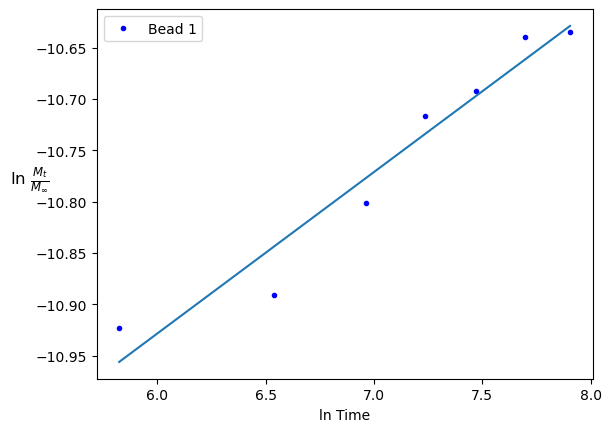

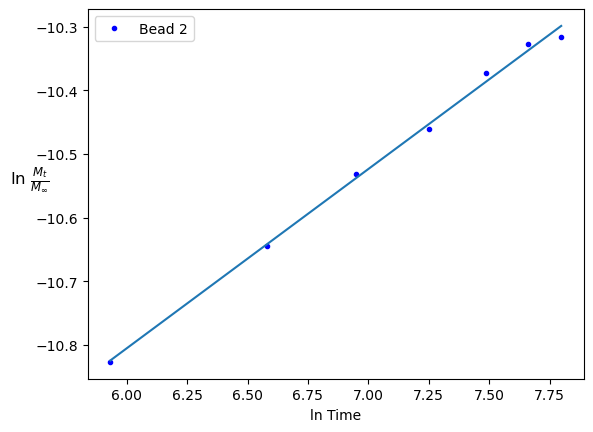

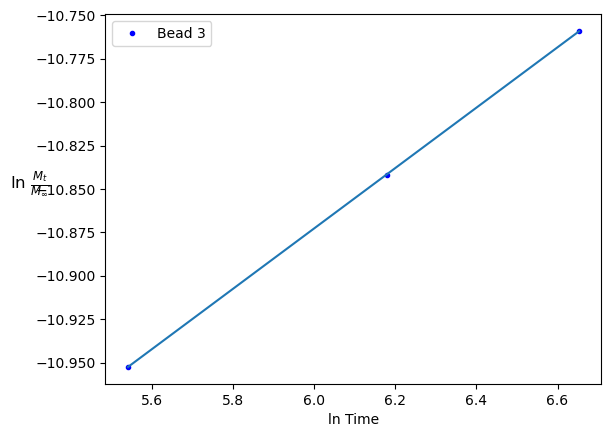

In [96]:
time_masses = [
    TARTRAZINE_MOLAR_MASS * SOLUTION_VOLUME * conc for conc in concentration
]  # kg
inf_mass = TARTRAZINE_DENSITY * TARTRAZINE_VOLUME  # kg

# Should put this in a loop but 
# the last case is weird so its fine
n_vals = []
k_vals = []

log_time = np.log(sample_times[:, 1])
log_mass = np.log(time_masses[0] / inf_mass)
slope, inter = np.polyfit(log_time, log_mass, 1)
n_vals.append(slope)
k_vals.append(np.exp(inter))

plt.plot(log_time, log_mass, "b.", label="Bead 1")
plt.plot(log_time, slope * log_time + inter)
plt.xlabel("ln Time")
plt.ylabel(r"ln $\frac{M_t}{M_\infty}$", rotation=0, fontdict={"size": 12})
plt.legend()
plt.show()

log_time = np.log(sample_times[:, 2])
log_mass = np.log(time_masses[1] / inf_mass)
slope, inter = np.polyfit(log_time, log_mass, 1)
n_vals.append(slope)
k_vals.append(np.exp(inter))

plt.plot(log_time, log_mass, "b.", label="Bead 2")
plt.plot(log_time, slope * log_time + inter)
plt.xlabel("ln Time")
plt.ylabel(r"ln $\frac{M_t}{M_\infty}$", rotation=0, fontdict={"size": 12})
plt.legend()
plt.show()

log_time = np.log(sample_times[:3, 3])
log_mass = np.log(time_masses[2] / inf_mass)
slope, inter = np.polyfit(log_time, log_mass, 1)
n_vals.append(slope)
k_vals.append(np.exp(inter))

plt.plot(log_time, log_mass, "b.", label="Bead 3")
plt.plot(log_time, slope * log_time + inter)
plt.xlabel("ln Time")
plt.ylabel(r"ln $\frac{M_t}{M_\infty}$", rotation=0, fontdict={"size": 12})
plt.legend()
plt.show()


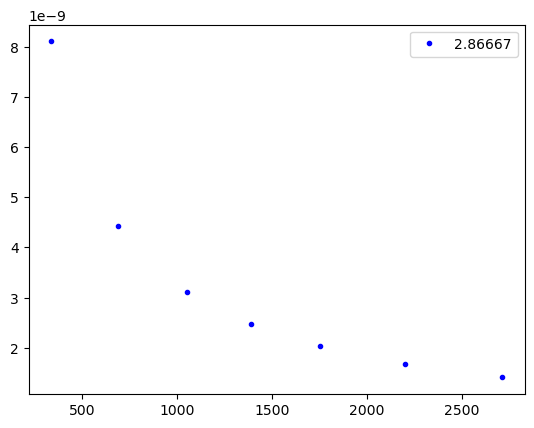

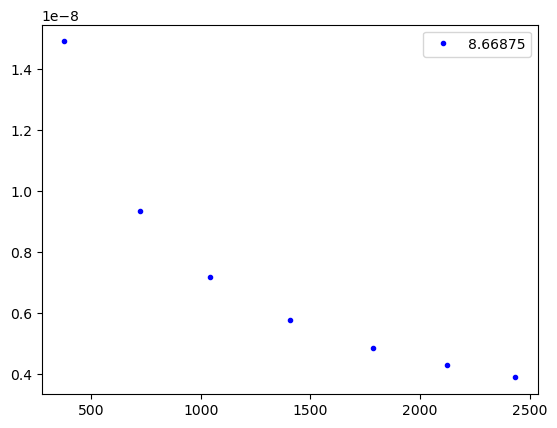

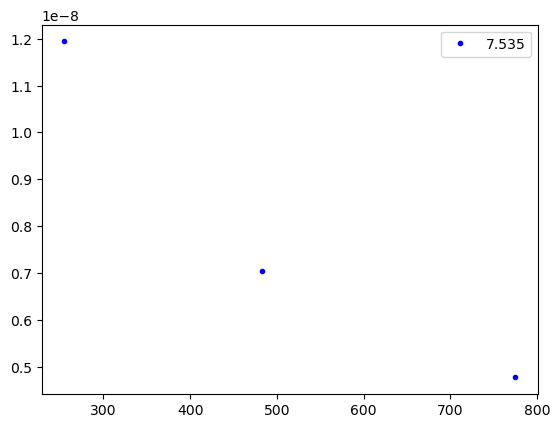

In [109]:
# dF / dt Calculations

def deriv_F(k: float, n: float, time: np.ndarray) -> np.ndarray:
    return k * n * (time**(n-1))

plt.plot(sample_times[:, 1], deriv_F(k_vals[0], n_vals[0], sample_times[:, 1]), "b.", label=f"{bead_diameter[0] * 1000}")
plt.legend()
plt.show()

plt.plot(sample_times[:, 2], deriv_F(k_vals[1], n_vals[1], sample_times[:, 2]), "b.", label=f"{bead_diameter[1] * 1000}")
plt.legend()
plt.show()

plt.plot(sample_times[:3, 3], deriv_F(k_vals[2], n_vals[2], sample_times[:3, 3]), "b.", label=f"{bead_diameter[2] * 1000}")
plt.legend()
plt.show()